# Laws of Probability

- Discrete Probability
- Continuous Probability


- LAWS
    - Bernoulli Law
    - Binomial Law
    - Poisson's Law
    - Continuous Uniform Law
    - Exponential Law
    - 

## Probaility Distributions

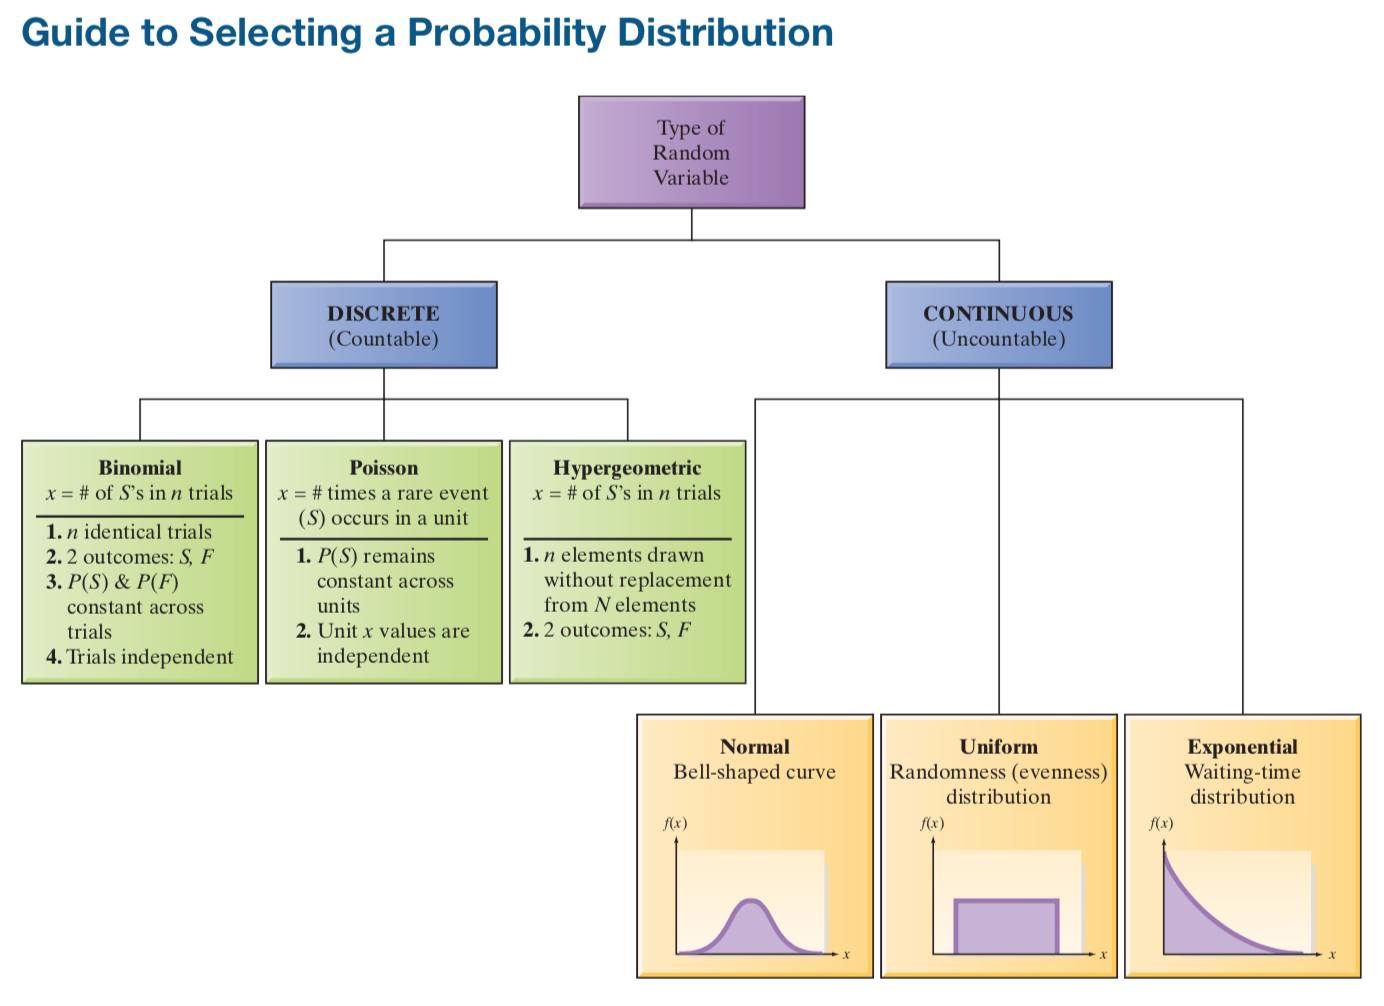







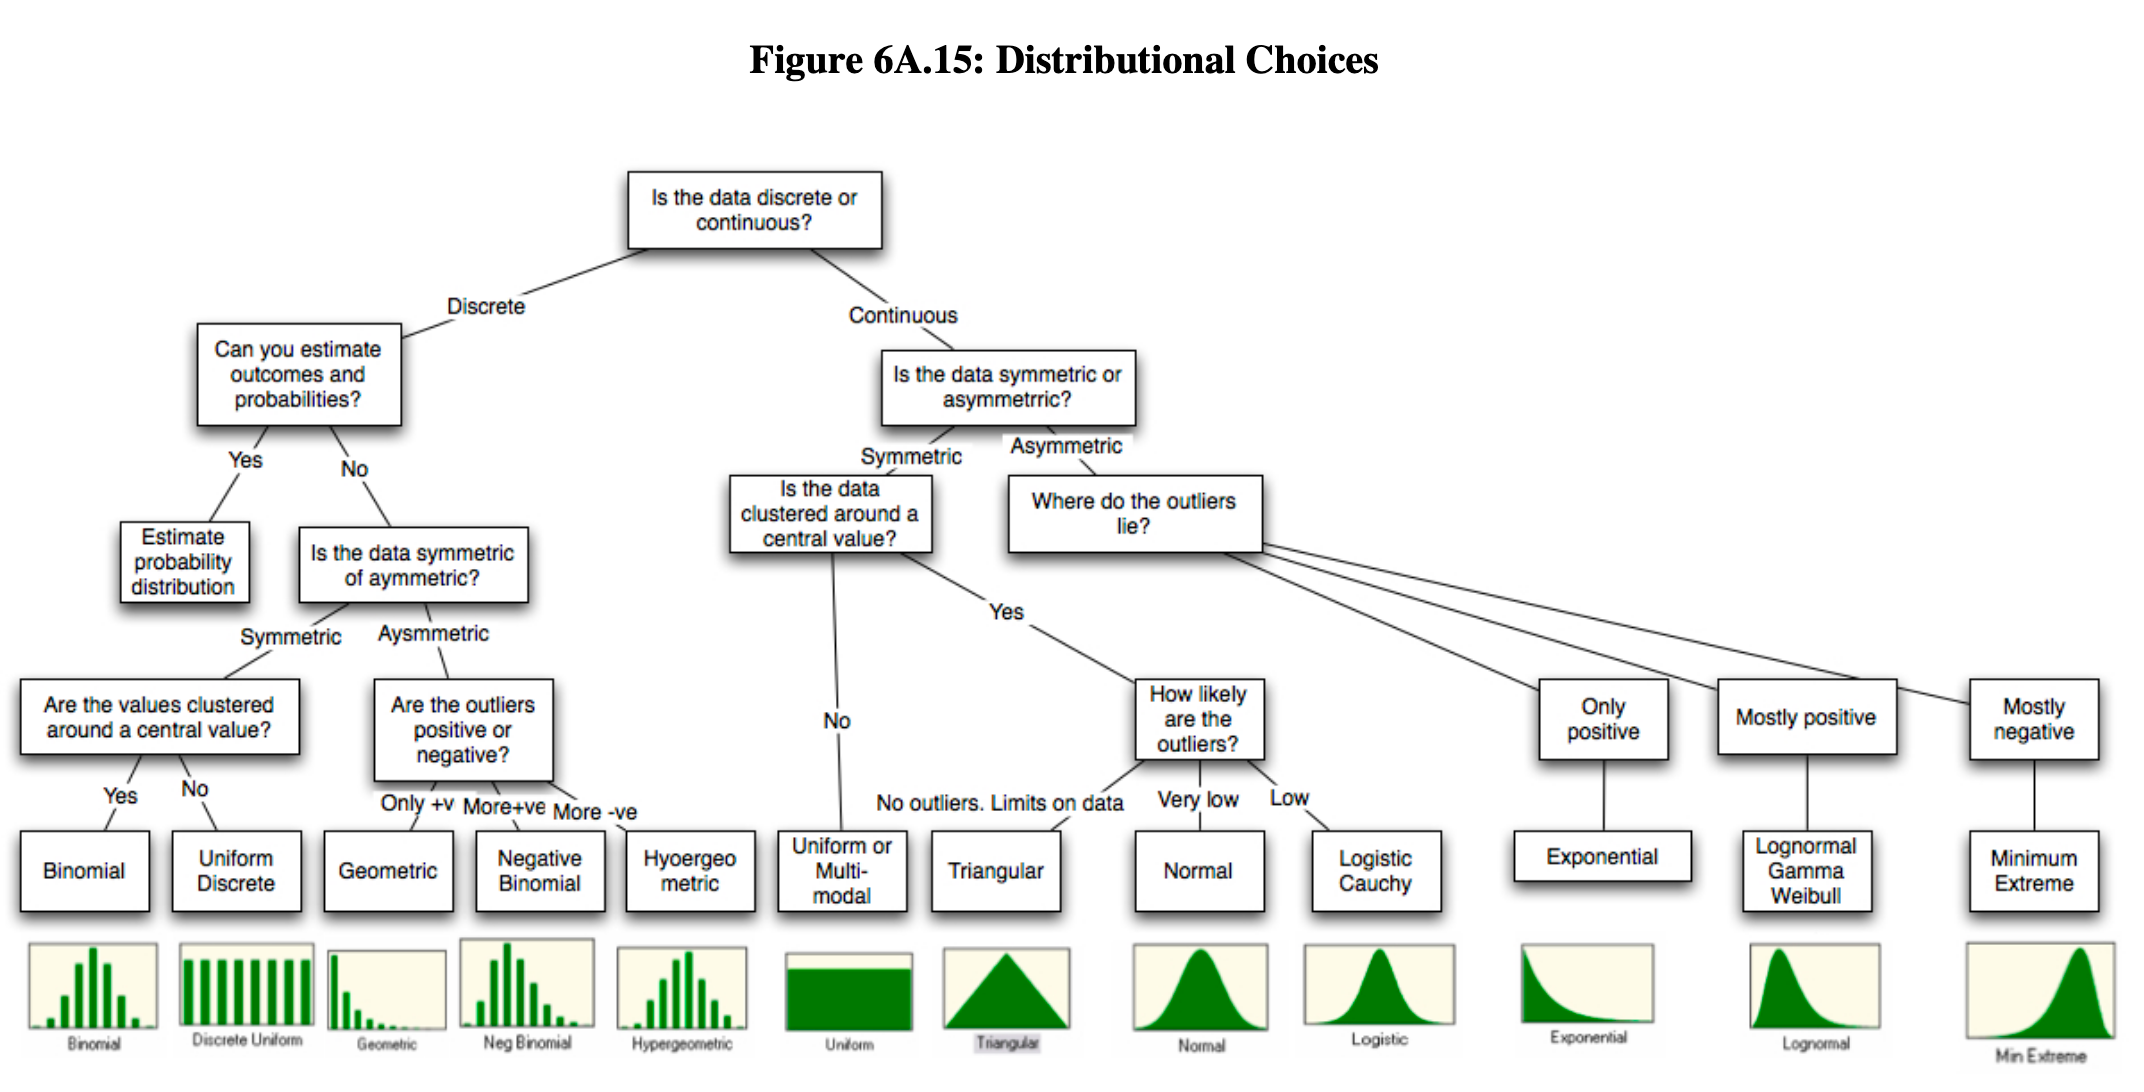





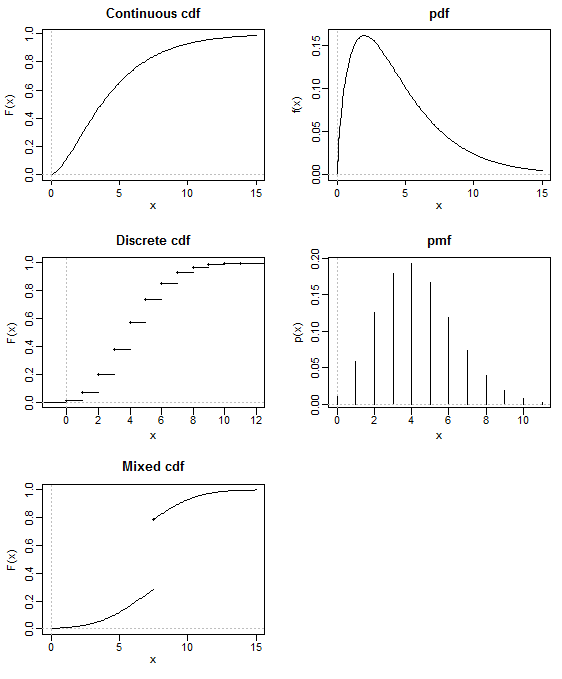

In [1]:
!pip install yfinance

In [4]:
!pip install seaborn

  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)


In [5]:
import numpy as np
import pandas as pd

# import yahoo finance library
import yfinance as yf

# import statistics libraries
from scipy.stats import binom, poisson, expon

# import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

### Bernoullis Law

Only two outcomes - success or failure


### Binomial Law

Multiple Bernoulli trials together.
Assumptions - random experiences and they must be indepedent
 It can serve as an anomaly detector or a tool for Bayesian A/B testing.

***Criteria*** \
Binomial distributions must also meet the following three criteria:

- The number of observations or trials is fixed. In other words, you can only figure out the probability of something happening if you do it a certain number of times. This is common sense—if you toss a coin once, your probability of getting a tails is 50%. If you toss a coin a 20 times, your probability of getting a tails is very, very close to 100%.
- Each observation or trial is independent. In other words, none of your trials have an effect on the probability of the next trial.
- The probability of success (tails, heads, fail or pass) is exactly the same from one trial to another.


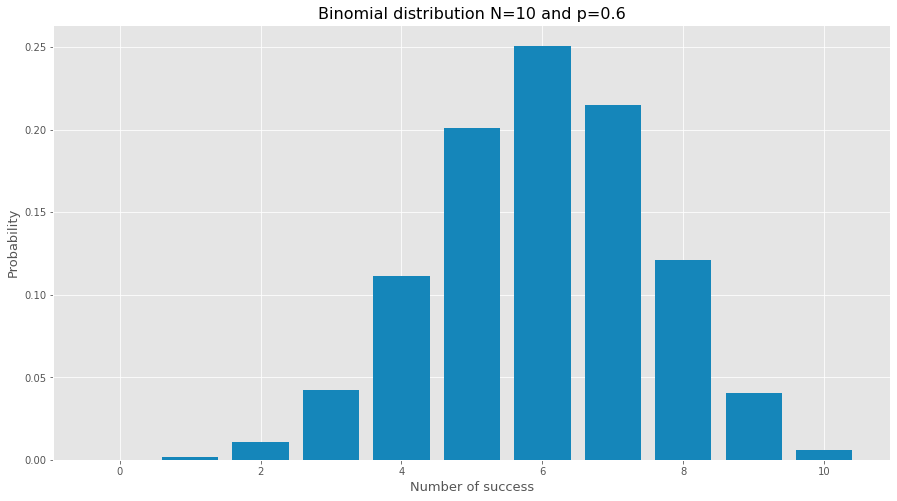

In [9]:
# Parameters needed for distribution
# - number of iterations (n)
# - probability of success (p)
# - list of outcomes
# - probability of each outcome



# ------------ Initialiaze distribution setting ---------------
# Number of iterations 
n = 10
# Probability of success
p = 0.6


# ------------ Compute the probability ---------------
# List of possible number of success
nb_success = list(range(n + 1))

# list of pmf values
proba = [binom.pmf(b, n, p) for b in nb_success ]


# ------------ Plot the density ---------------
# Adapt the size
plt.figure(figsize=(15,8))

# Plot the distribution
plt.bar(nb_success, proba, color="#1586BA")

# Give x/y labels and a title
plt.title(f"Binomial distribution N={n} and p={p}", size=16)
plt.xlabel("Number of success", size=13)
plt.ylabel("Probability", size=13)

plt.show()

### Poisson Law
The Poisson distribution is the discrete probability distribution of the number of events occurring in a given time period, given the average number of times the event occurs over that time period.

For the binomial distribution, there were just two: yes or no. For the Poisson distribution, there might be more, but they can only be natural numbers: 0, 1, 2, and so on.

Poisson distribution describes events that occur at some rate over time od space. It can be used to conduct queueing simulations that help allocate resources.


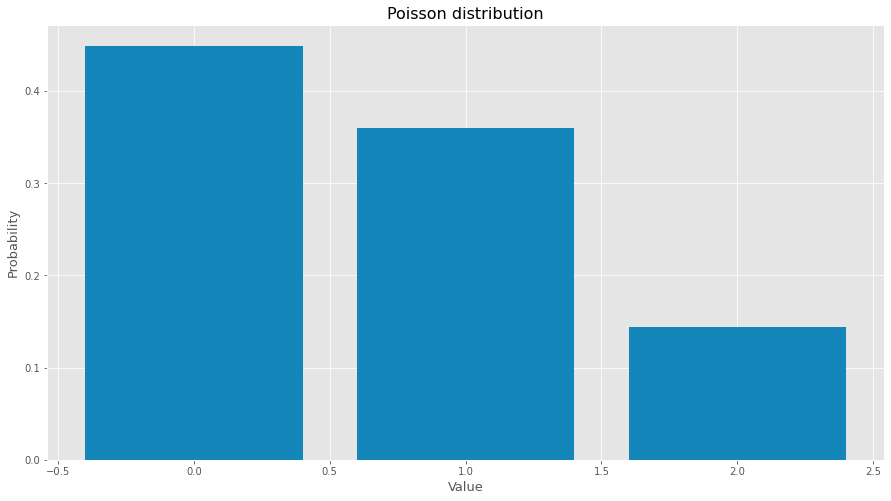

In [7]:
# parameters needed for the distribution
# - lambda 

# ------------ Simulate Poisson Process ---------------
# Set lambda parameter
l = 0.8

# Find the discrete values which cover the domain
x = np.arange(poisson.ppf(0.01, l),
             poisson.ppf(0.99, l))

# Compute the proba of each value
proba = poisson.pmf(x, l)

# ------------ Plot the density ---------------
# Adapt the size
plt.figure(figsize=(15,8))

# Plot the distribution
plt.bar(x, proba, color="#1586BA")

# Give x/y labels and a title
plt.title(f"Poisson distribution", size=16)
plt.xlabel("Value", size=13)
plt.ylabel("Probability", size=13)

plt.show()

### Poisson distribution vs. Binomial
- If your question has an average probability of an event happening per unit (i.e. per unit of time, cycle, event) and you want to find probability of a certain number of events happening in a period of time (or number of events), then use the Poisson Distribution.
- If you are given an exact probability and you want to find the probability of the event happening a certain number of times out of x (e.g., 10 times out of 100, or 99 times out of 1000), use the Binomial Distribution formula.

### Continuous Uniform Law

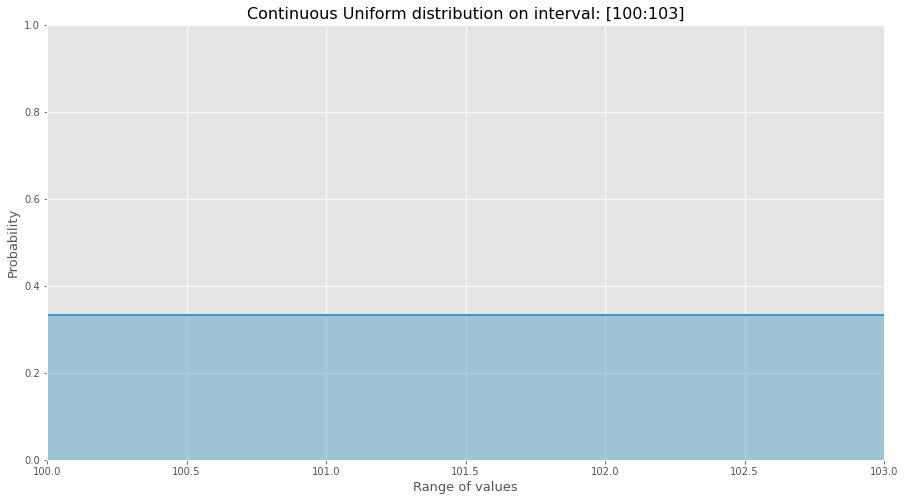

In [10]:
# ------------ Initialiaze distribution setting ---------------
a = 100
b = 103

# ------------ Plot the density ---------------
# Adapt the size
plt.figure(figsize=(15,8))

# Plot the distribution
plt.axhline(1/(b-a), color="#1586BA")
plt.fill_between([a,b],0, 1/(b-a), color="#1586BA", alpha=0.35)

# Give x/y labels and a title
plt.title(f"Continuous Uniform distribution on interval: [{a}:{b}]", size=16)
plt.xlabel("Range of values", size=13)
plt.ylabel("Probability", size=13)

#
plt.ylim([0,1])
plt.xlim([a,b])


plt.show()

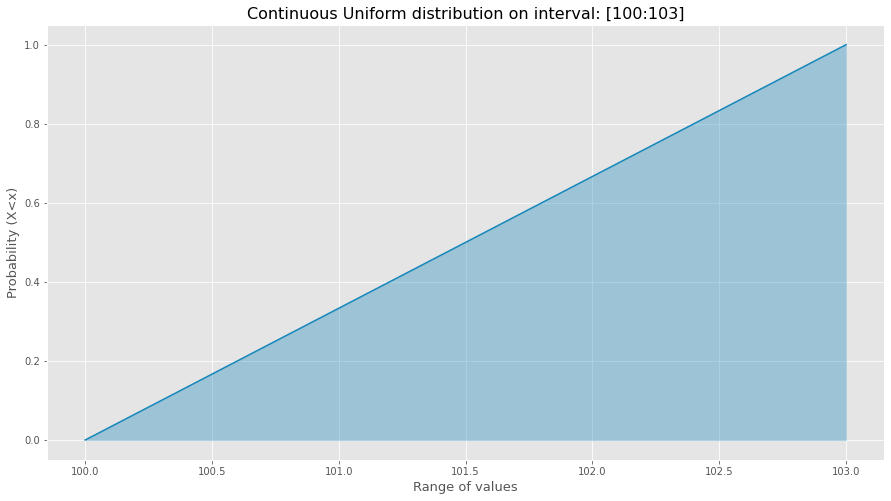

In [11]:
# ------------ Initialiaze distribution setting ---------------
a = 100
b = 103

domain = np.linspace(a,b,50)
p = [(x-a)/(b-a) for x in domain]
# ------------ Plot the density ---------------
# Adapt the size
plt.figure(figsize=(15,8))

# Plot the distribution
plt.plot(domain, p,color="#1586BA")
plt.fill_between(domain,0, p, color="#1586BA", alpha=0.35)

# Give x/y labels and a title
plt.title(f"Continuous Uniform distribution on interval: [{a}:{b}]", size=16)
plt.xlabel("Range of values", size=13)
plt.ylabel("Probability (X<x)", size=13)

#
# plt.ylim([0,1])
# plt.xlim([a,b])


plt.show()

### Exponential Law

Describes that the time between two events following the Poisson distribution. It can be used as an anomaly detector or as a simple benchmark for predictive models

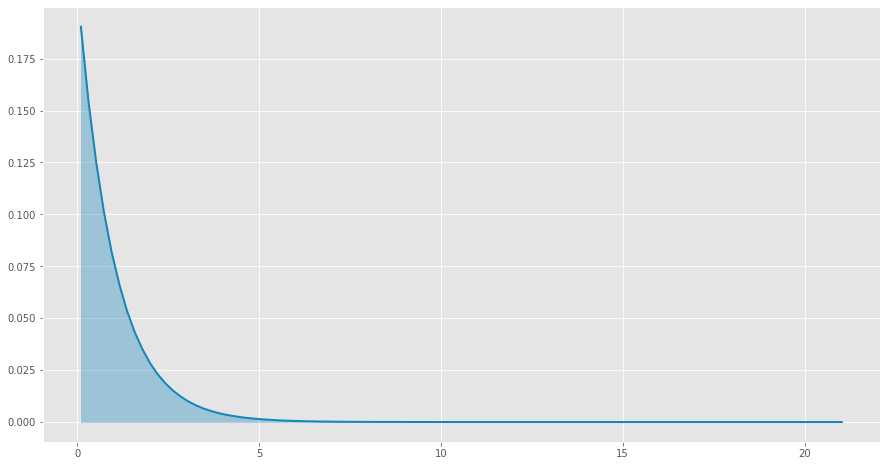

In [12]:
# parameters needed for distribution
# - 

import numpy as np
from scipy.interpolate import UnivariateSpline
from matplotlib import pyplot as plt

N = 10000000
n = N//100000
s = np.random.exponential(scale=1, size=(N,)) # generate your data sample with N elements
p, x = np.histogram(s, bins=n) # bin it into n = N//10 bins
x = x[:-1] + (x[1] - x[0])/2   # convert bin edges to centers
f = UnivariateSpline(x, p, s=n)
plt.figure(figsize=(15,8))
plt.plot(x, f(x)/N, color="#1586BA", linewidth=2)
plt.fill_between(x,0, f(x)/N, color="#1586BA", alpha=0.35)

plt.show()

<AxesSubplot:ylabel='Density'>

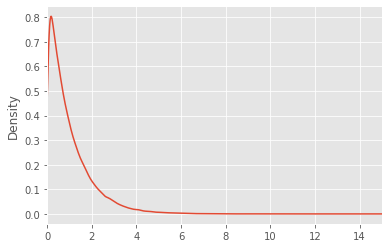

In [14]:
# ------------ Simulate realization coming from a exponential law ---------------
arr = np.random.exponential(scale=1, size=(100000,))
df = pd.DataFrame(arr, columns=["sim"]).sort_values(by="sim", ascending=True)
df["probability"] = 1/len(df)

df["sim"].plot(kind="kde", xlim=[0,15])

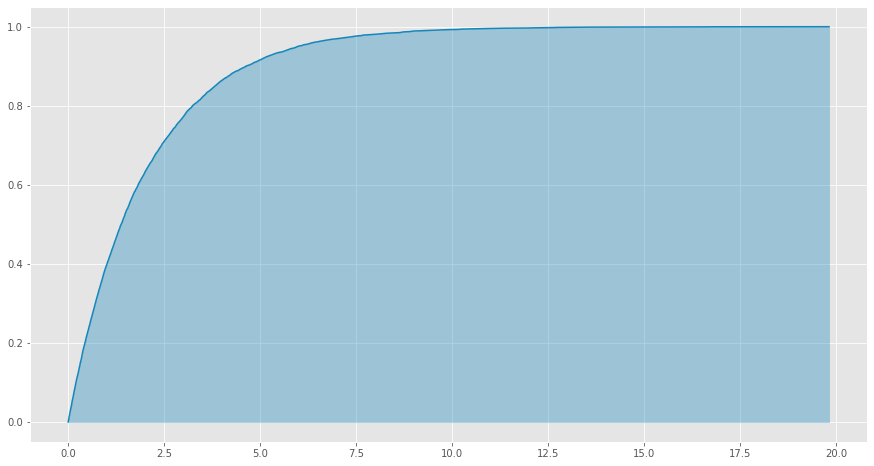

In [16]:
arr = np.random.exponential(scale=2, size=(10000,))
df = pd.DataFrame(arr, columns=["sim"]).sort_values(by="sim", ascending=True)
df["probability"] = 1/len(df)

plt.figure(figsize=(15,8))
plt.plot(df["sim"], df["probability"].cumsum(), color="#1586BA")
plt.fill_between(df["sim"],0, df["probability"].cumsum(), color="#1586BA", alpha=0.35)

### Normal Law

Describes some statistics computed from random data samples, as established by the Central Limit Theorem. Thanks to this, we can assume the normality of errors in regression models, or conduct some hypothesis tests easily.

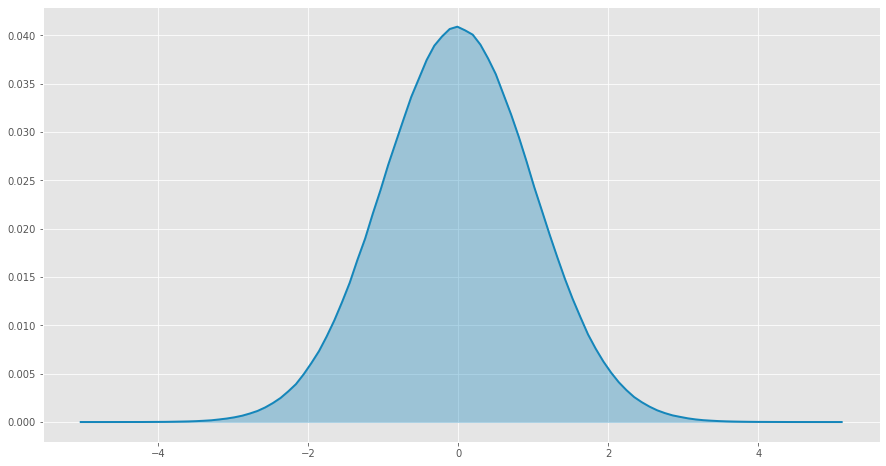

In [17]:
import numpy as np
from scipy.interpolate import UnivariateSpline
from matplotlib import pyplot as plt

N = 10000000
n = N//100000
s = np.random.normal(scale=1, size=(N,)) # generate your data sample with N elements
p, x = np.histogram(s, bins=n) # bin it into n = N//10 bins
x = x[:-1] + (x[1] - x[0])/2   # convert bin edges to centers
f = UnivariateSpline(x, p, s=n)
plt.figure(figsize=(15,8))
plt.plot(x, f(x)/N, color="#1586BA", linewidth=2)
plt.fill_between(x,0, f(x)/N, color="#1586BA", alpha=0.35)

plt.show()

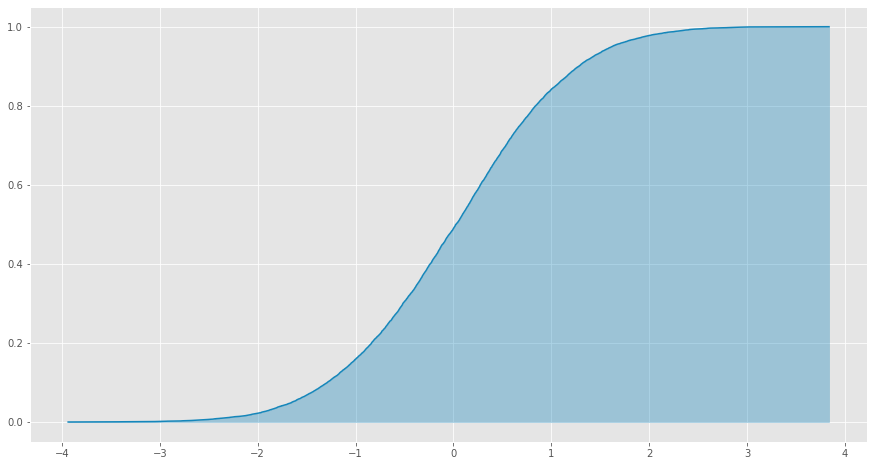

In [18]:
#plt.plot(np.random.exponential(scale=2, size=(1000)))

arr = np.random.normal(scale=1, size=(10000,))
df = pd.DataFrame(arr, columns=["sim"]).sort_values(by="sim", ascending=True)
df["probability"] = 1/len(df)

plt.figure(figsize=(15,8))
plt.plot(df["sim"], df["probability"].cumsum(), color="#1586BA")
plt.fill_between(df["sim"],0, df["probability"].cumsum(), color="#1586BA", alpha=0.35)


### Chi- Squared

### F Distribution

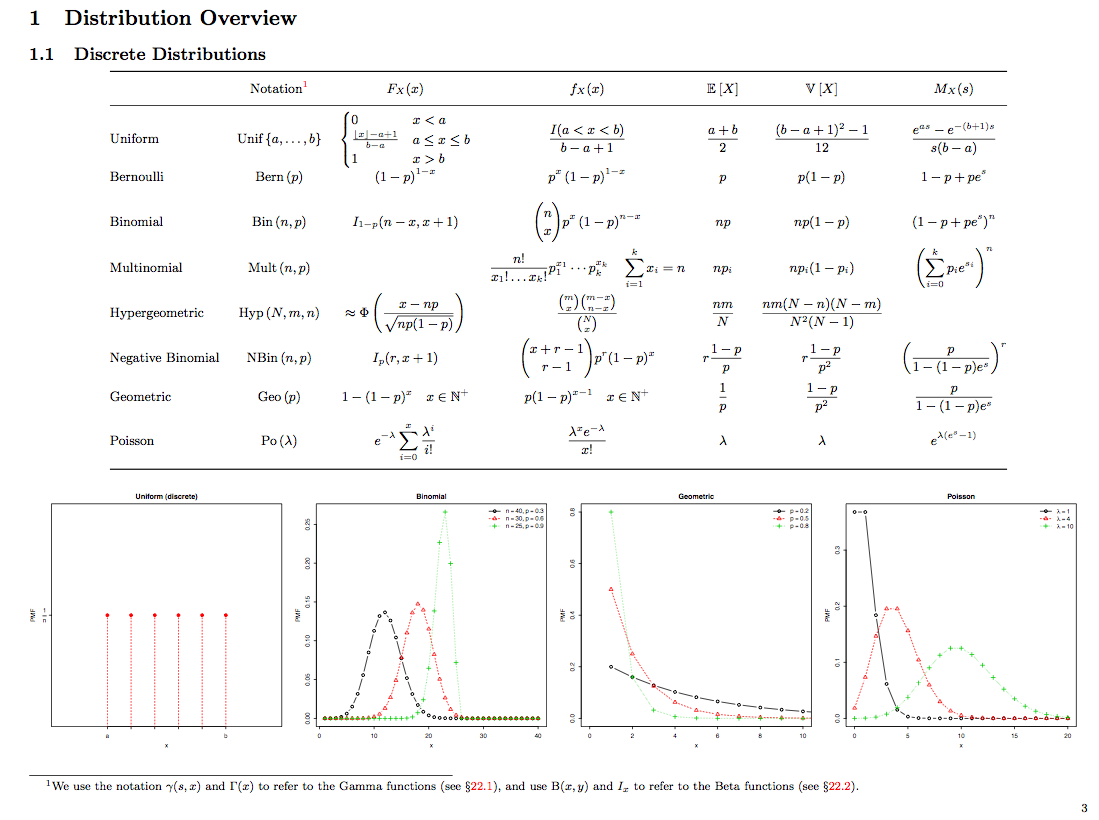




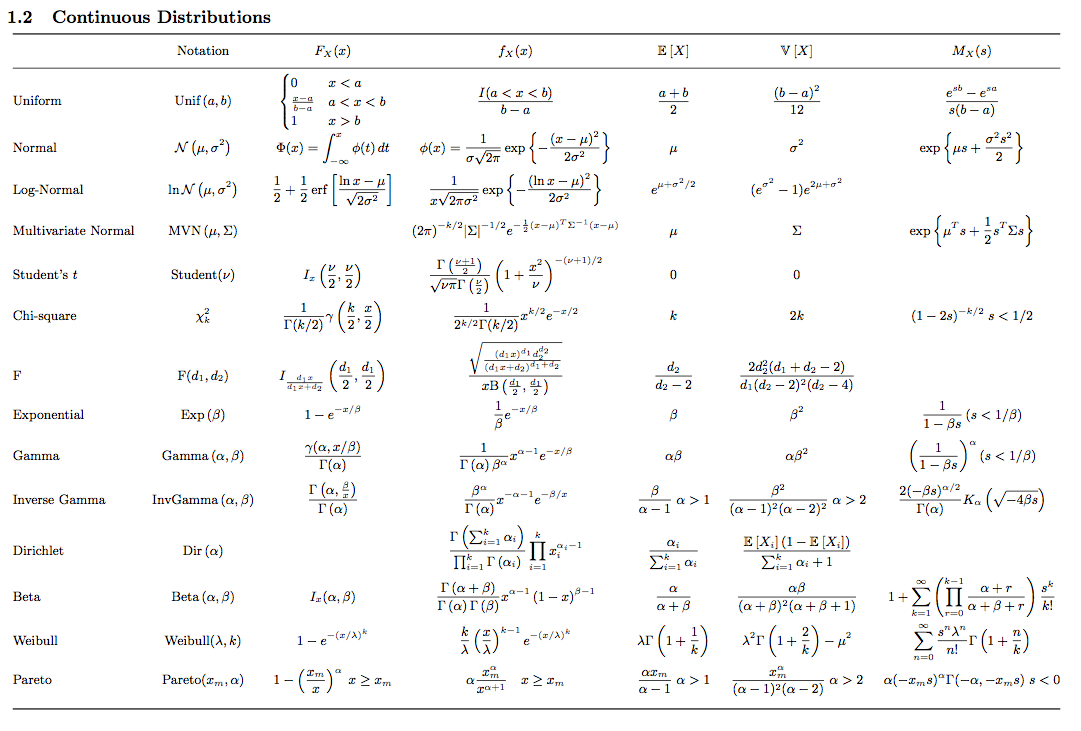

## Compute the Value At Risk


In [20]:
# Download data 
df = yf.download("GOOG").pct_change(1).dropna()


[*********************100%***********************]  1 of 1 completed


<AxesSubplot:ylabel='Density'>

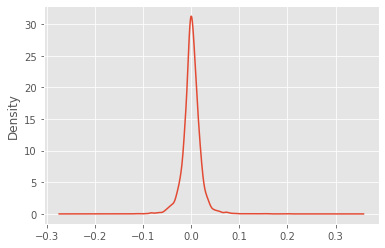

In [21]:
df["Close"].plot(kind="kde")

In [26]:
# Calculate value at risk
val_at_risk = np.quantile(df["Adj Close"], 0.05)*100
print(f"Value at Risk : {'%.2f'% val_at_risk} %")

Value at Risk : -2.76 %


# Analyse - Stop loss and Take Profit

In [29]:
# import data
df = yf.download("GOOG")
# show downloaded dataframe
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276
...,...,...,...,...,...,...
2022-04-14,2612.989990,2614.205078,2542.229980,2545.060059,2545.060059,1171400
2022-04-18,2548.199951,2574.239990,2531.569092,2559.219971,2559.219971,745900
2022-04-19,2561.540039,2618.074951,2549.030029,2610.620117,2610.620117,1136000


In [31]:
# Calculate range of high and low prices compared to the opening price over the day for each stock
df['highRange'] = (df['High'] -df['Open'])/df['Open']
df['lowRange'] = (df['Low'] -df['Open'])/df['Open']

df

,Open,High,Low,Close,Adj Close,Volume,highRange,lowRange
Date,,,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361,0.040600,-0.040400
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874,0.079893,-0.005049
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897,0.024650,-0.015350
2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808,0.003236,-0.068950
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276,0.028963,-0.010290
...,...,...,...,...,...,...,...,...
2022-04-14,2612.989990,2614.205078,2542.229980,2545.060059,2545.060059,1171400,0.000465,-0.027080
2022-04-18,2548.199951,2574.239990,2531.569092,2559.219971,2559.219971,745900,0.010219,-0.006527
2022-04-19,2561.540039,2618.074951,2549.030029,2610.620117,2610.620117,1136000,0.022071,-0.004884


In [38]:
# ---------------------------------------------------------------------------
# HIGH RANGE
# ---------------------------------------------------------------------------
# -------- Prepare the data ----------
# Remove missing values and order them
dfh = df[["highRange"]].dropna().sort_values(by="highRange", ascending=True)

# Weight for each value
dfh["probability"] = 1/len(dfh)



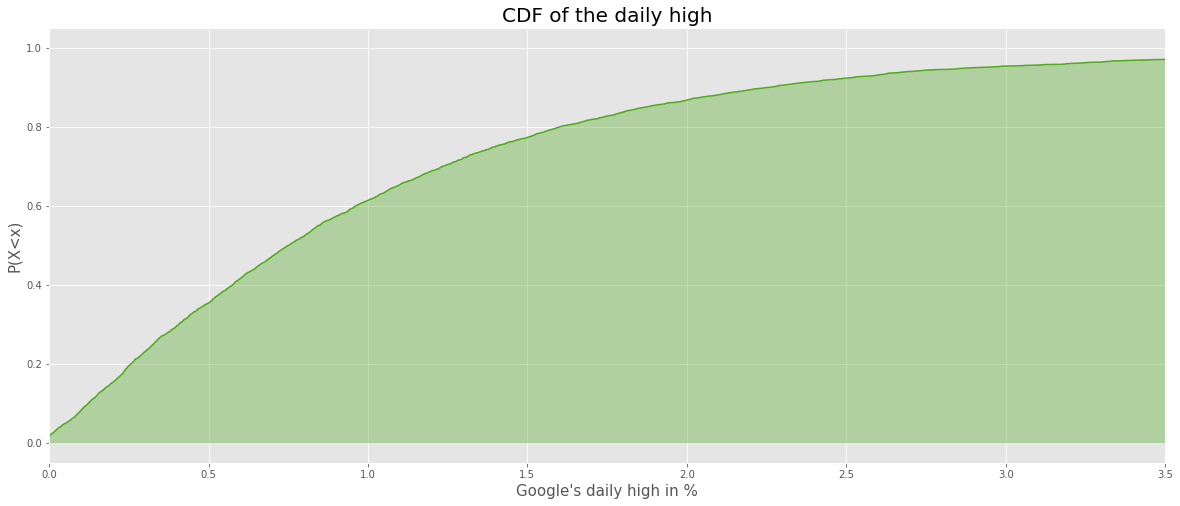

In [39]:
# -------- Plot the graph ----------
# Adapt the size
plt.figure(figsize=(20,8))

# Put a ylabel
plt.ylabel("P(X<x)", size=15)

# Put a xlabel
plt.xlabel("Google's daily high in %", size=15)

# Put a title
plt.title("CDF of the daily high", size=20)

# Plot the line of the CDF
plt.plot(dfh["highRange"]*100, dfh["probability"].cumsum(), color="#50AB1E")

# Plot the area of the CDF
plt.fill_between(dfh["highRange"]*100,0, dfh["probability"].cumsum(), color="#50AB1E", alpha=0.35)

# Define x limits
plt.xlim([0,3.5])

# Plot the graph
plt.show()

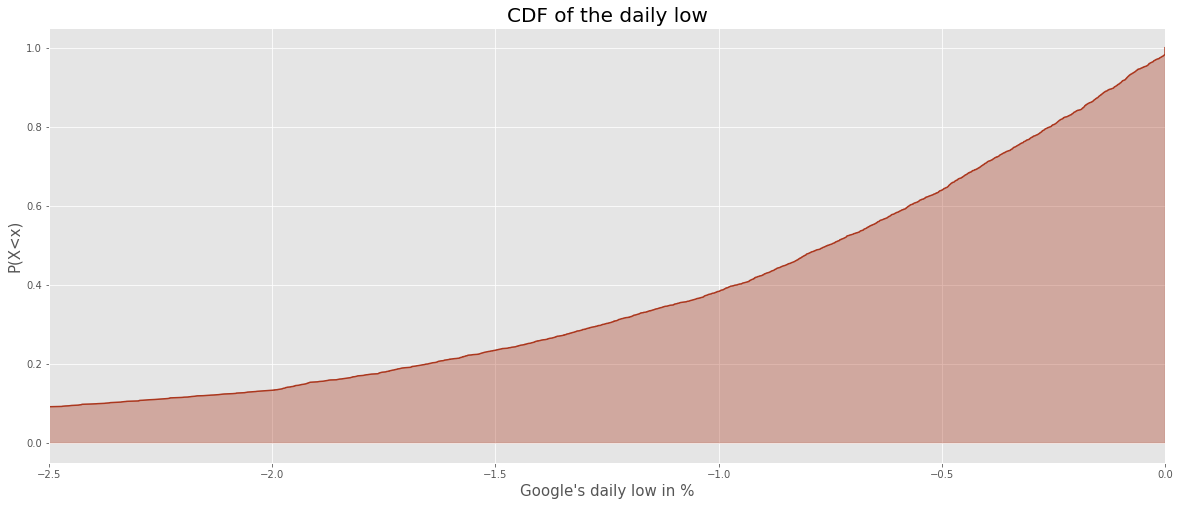

In [43]:
# ----------------------------------------
# LOW RANGE
# ----------------------------------------
# -------- Prepare the data ----------

# Remove missing values and order them
dfl = df[["lowRange"]].dropna().sort_values(by="lowRange", ascending=True)

# Weight for each value
dfl["probability"] = 1/len(dfl)


# -------- Plot the graph ----------
# Adapt the size
plt.figure(figsize=(20,8))

# Put a ylabel
plt.ylabel("P(X<x)", size=15)

# Put a xlabel
plt.xlabel("Google's daily low in %", size=15)

# Put a title
plt.title("CDF of the daily low", size=20)

# Plot the line of the CDF
plt.plot(dfl["lowRange"]*100, dfl["probability"].cumsum(), color="#AB371E")

# Plot the area of the CDF
plt.fill_between(dfl["lowRange"]*100,0, dfl["probability"].cumsum(), color="#AB371E", alpha=0.35)

# Define x limits
plt.xlim([-2.5, 0])

# Plot the graph
plt.show()